In [26]:
%matplotlib inline
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
df = pd.read_csv('Final_Cleaned.csv', encoding='utf-8', sep=';')

columns_to_drop = df.columns[df.count() < 20000]
df1 = df1.drop(columns=columns_to_drop)

df1['Age'] = 2023 - df['constructed']
df1 = df1.drop(columns=['road','udbetaling','seller', 'full_address', 'zip_address',
                            'link to seller', 'city_3', 'zip address', 'city_2', 'zip',
                           'extra', 'constructed', 'days at current seller'])


<Axes: xlabel='property_type', ylabel='sqm_price'>

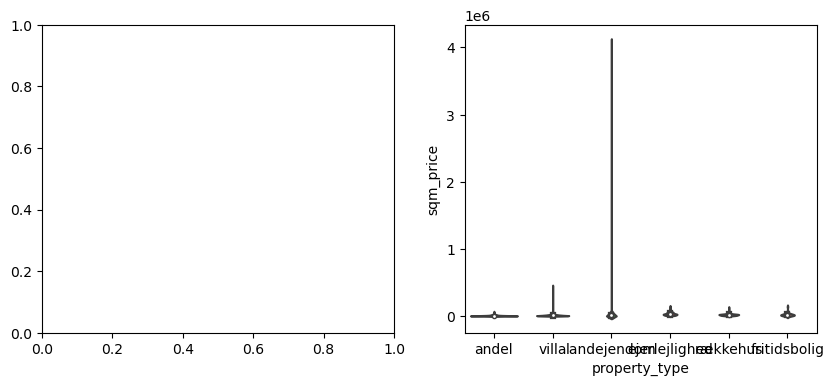

In [27]:
f,ax = plt.subplots(1,2, figsize=(10,4))
#ns.barplot(x='day', y='tip',hue='sex', data=tips, ax=ax[0]) 
sns.violinplot(x='property_type', y='sqm_price', data=df1, ax=ax[1])